# Confidence Intervals

Confidence intervals provide a range of values that are possible for a parameter.  We can use bootstrapping and sampling distributions to create a confidence interval for any population parameter.

Confidence intervals do not allow us to say anything specific about an individual in the population.  These are aimed at telling us aggregate information.  You cannot talk about individuals with confidence intervals!

In [22]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

## Estimating a Parameter

We can use our sampling distribution to develop a confidence interval.  Here's an example:

1. Assume we have a sample of 200 people with their heights.
1. We build a sample distribution via bootstrapping.  We sample 10,000 times and get a normally distributed mean.  We perform the sampling over the same 200 people with replacement.
1. When then take 2.5% off either end of that curve so we are 95% confident a person's height falls within those two values.

In [11]:
np.random.seed(16)
heights = np.random.randint(5*12, 6.5*12, size=200)

mean_heights = []
for _ in range(10000):
    mean_heights.append(np.random.choice(heights, size=20).mean())
    
len(mean_heights)

10000

''

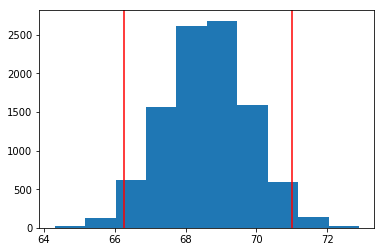

In [21]:
# did we get a normal distribution?  yes!
plt.hist(mean_heights)
plt.axvline(x=np.percentile(mean_heights, 2.5), color='red')
plt.axvline(x=np.percentile(mean_heights, 97.5), color='red')
;

In [19]:
print("95% confidence interval:", np.percentile(mean_heights, 2.5), "and", np.percentile(mean_heights, 97.5))

95% confidence interval: 66.25 and 71.0


## Other Things to Know

* Confidence Interval Width
    * The confidence interval width as the difference between your upper and lower bounds of your confidence interval.
    * Increase sample size to decrease this width.
    * Increasing your confidence level will increase your width.
* Margin of Error (MOE)
    * The margin of error is half the confidence interval width, and the value that you add and subtract from your sample estimate to achieve your confidence interval final results.
    * This is the "+/- X%" we see in findings.
    * So, 25% +/- 3% turns into a range of 22 to 28%.
* Confidence intervals do not allow us to say anything specific about an individual in the population.  These are aimed at telling us aggregate information.  Machine learning and regression can tell us information about an individual in the population.
    * Good: We are 95% confident that the proportion of users that click through using Page A is higher than the average using Page B.
        * We are talking about the aggregate here.
    * Bad: We are 95% confident that if a user receives Page A they are more likely to click than if they receive Page B.
        * We are talking about an individual user here, which we cannot do with confidence intervals.
* Practical vs. Statistical Significance
    * When making business decisions, consider real world aspects (time, money, effort, etc.) and not just the statistical significance findings.